In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

from matplotlib import transforms

from xgboost import XGBClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [3]:
# To Read out 100 rows rather than the default value. 
pd.set_option('display.max_rows', 1000)

In [4]:
filenames = glob('D:\Spring 2019\DS 440\Data\kplr_dr25_inj*.csv')
df = pd.concat([pd.read_csv(f) for f in filenames], ignore_index = True)

print('Size: ')
print(df.shape)

Size: 
(199984, 25)


In [5]:
'''
plti_inj1 = pd.read_csv('D:\Spring 2019\DS 440\Data\kplr_dr25_inj1_plti.csv', header = 0)
plti_inj2 = pd.read_csv('D:\Spring 2019\DS 440\Data\kplr_dr25_inj2_plti.csv', header = 0)
plti_inj3 = pd.read_csv('D:\Spring 2019\DS 440\Data\kplr_dr25_inj3_plti.csv', header = 0)

print('"kplr_dr25_inj1_plti" Size: ')
print(plti_inj1.shape)

print('\n"kplr_dr25_inj2_plti" Size: ')
print(plti_inj2.shape)

print('\n"kplr_dr25_inj3_plti" Size: ')
print(plti_inj3.shape)
'''

'\nplti_inj1 = pd.read_csv(\'D:\\Spring 2019\\DS 440\\Data\\kplr_dr25_inj1_plti.csv\', header = 0)\nplti_inj2 = pd.read_csv(\'D:\\Spring 2019\\DS 440\\Data\\kplr_dr25_inj2_plti.csv\', header = 0)\nplti_inj3 = pd.read_csv(\'D:\\Spring 2019\\DS 440\\Data\\kplr_dr25_inj3_plti.csv\', header = 0)\n\nprint(\'"kplr_dr25_inj1_plti" Size: \')\nprint(plti_inj1.shape)\n\nprint(\'\n"kplr_dr25_inj2_plti" Size: \')\nprint(plti_inj2.shape)\n\nprint(\'\n"kplr_dr25_inj3_plti" Size: \')\nprint(plti_inj3.shape)\n'

In [6]:
temp_df = df.iloc[:, 0:15]
df_drop = temp_df[temp_df.isnull().any(axis=1)]
temp_df = temp_df.drop(df_drop.index.values)
print(temp_df.shape)

X = temp_df.iloc[:, 1:14]
Y = temp_df.iloc[:, 14]
cols_indices = X.columns

(199878, 15)


In [7]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 350, num = 5)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 2, stop = 30, num = 10)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

#Create the param frid
param_grid = dict(n_estimators = n_estimators,
                  max_depth = max_depth,
                  min_samples_split = min_samples_split,
                  min_samples_leaf = min_samples_leaf)

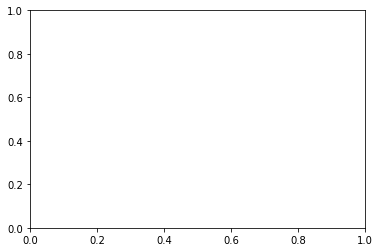

In [8]:
xgb = XGBClassifier() #n_estimators, max_depth
abc = AdaBoostClassifier() #n_estimators
etc = ExtraTreesClassifier() #n_estimators, max_depth, min_smaples_split, min_samples_leaf
rfc = RandomForestClassifier() #n_estimators, max_depth, min_smaples_split, min_samples_leaf
gbc = GradientBoostingClassifier() #n_estimators, max_depth, min_smaples_split, min_samples_leaf

kfold = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 7)

plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, len(max_depth)))))

In [9]:
grid_search = GridSearchCV(etc, param_grid, scoring = "neg_log_loss", n_jobs = -1, cv = kfold, verbose = 2)
grid_result = grid_search.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
# plot results
plt.figure(figsize = (19.20, 10.80), dpi = 300)
plt.tight_layout()

scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend(loc = 'lower right', fontsize = 12)
plt.xlabel('n_estimators', fontsize=20)
plt.xticks(fontsize = 20)
plt.ylabel('Log Loss', fontsize=20)
plt.yticks(fontsize = 20)
plt.savefig('etc - n_estimators_vs_max_depth.jpg', dpi = 300, bbox_inches='tight')
plt.show()

Fitting 3 folds for each of 450 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 49.9min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 100.2min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed: 160.7min finished


Best: -0.351161 using {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 350}
-0.713669 (0.005216) with: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
-0.710544 (0.002537) with: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 95}
-0.710278 (0.000783) with: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 180}
-0.708205 (0.001620) with: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 265}
-0.711442 (0.001811) with: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 350}
-0.708481 (0.004430) with: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10}
-0.709596 (0.001095) with: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 95}
-0.712240 (0.000314) with: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 180}


ValueError: cannot reshape array of size 450 into shape (10,5)

<Figure size 5760x3240 with 0 Axes>

In [ ]:
grid_search = GridSearchCV(rfc, param_grid, scoring = "neg_log_loss", n_jobs = -1, cv = kfold, verbose = 2)
grid_result = grid_search.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
# plot results
plt.figure(figsize = (19.20, 10.80), dpi = 300)
plt.tight_layout()

scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend(loc = 'lower right', fontsize = 12)
plt.xlabel('n_estimators', fontsize=20)
plt.xticks(fontsize = 20)
plt.ylabel('Log Loss', fontsize=20)
plt.yticks(fontsize = 20)
plt.savefig('rfc - n_estimators_vs_max_depth.jpg', dpi = 300, bbox_inches='tight')
plt.show()

In [ ]:
grid_search = GridSearchCV(gbc, param_grid, scoring = "neg_log_loss", n_jobs = -1, cv = kfold, verbose = 2)
grid_result = grid_search.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
# plot results
plt.figure(figsize = (19.20, 10.80), dpi = 300)
plt.tight_layout()

scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend(loc = 'lower right', fontsize = 12)
plt.xlabel('n_estimators', fontsize=20)
plt.xticks(fontsize = 20)
plt.ylabel('Log Loss', fontsize=20)
plt.yticks(fontsize = 20)
plt.savefig('gbc - n_estimators_vs_max_depth.jpg', dpi = 300, bbox_inches='tight')
plt.show()

In [ ]:
#Update the param frid
param_grid = dict(n_estimators = n_estimators,
                  max_depth = max_depth)

In [ ]:
grid_search = GridSearchCV(xgb, param_grid, scoring = "neg_log_loss", n_jobs = -1, cv = kfold, verbose = 2)
grid_result = grid_search.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
# plot results
plt.figure(figsize = (19.20, 10.80), dpi = 300)
plt.tight_layout()

scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend(loc = 'lower right', fontsize = 12)
plt.xlabel('n_estimators', fontsize=20)
plt.xticks(fontsize = 20)
plt.ylabel('Log Loss', fontsize=20)
plt.yticks(fontsize = 20)
plt.savefig('xgb - n_estimators_vs_max_depth.jpg', dpi = 300, bbox_inches='tight')
plt.show()

In [ ]:
#Update the param frid
param_grid = dict(n_estimators = n_estimators)

In [ ]:
grid_search = GridSearchCV(abc, param_grid, scoring = "neg_log_loss", n_jobs = -1, cv = kfold, verbose = 10)
grid_result = grid_search.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
# plot results
plt.figure(figsize = (19.20, 10.80), dpi = 300)
plt.tight_layout()

plt.errorbar(n_estimators, means, yerr=stds)
plt.title("AdaBoost n_estimators vs Log Loss")
plt.xlabel('n_estimators', fontsize=20)
plt.xticks(fontsize = 20)
plt.ylabel('Log Loss', fontsize=20)
plt.yticks(fontsize = 20)
plt.savefig('abc - n_estimators.jpg', dpi = 300, bbox_inches='tight')
plt.show()